In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# para abrir nao precisei dar o caminho completo porque esta tudo na mesma pasta,
# porem so funcionou quando atribui o separador e o o encoding
df_2019 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2019.csv',  sep=';', encoding='ISO-8859-1')
df_2020 = pd.read_csv(r'C:\Users\marco\microdados\MICRODADOS_ENEM_2020.csv',  sep=';', encoding='ISO-8859-1')

# Dicionarios

In [21]:
def categorizar_renda_per_capita(df):
    faixa_renda = {
        "A": 0,       
        "B": 1045.00,
        "C": 1567.50,
        "D": 2090.00,
        "E": 2612.50,
        "F": 3135.00,
        "G": 4180.00,
        "H": 5225.00,
        "I": 6270.00,
        "J": 7315.00,
        "K": 8360.00,
        "L": 9405.00,
        "M": 10450.00,
        "N": 12540.00,
        "O": 15675.00,
        "P": 20900.00,
        "Q": 20900.01  
    }

    df['Renda_Familiar'] = df['Q006'].map(faixa_renda)

    # Calcular a renda per capita 
    df['Renda_Percapita'] = df['Renda_Familiar'] / df['Q005']

    # Categorizar em tres grupos: Baixa, Média e Alta
    df['Faixa_Renda_Percapita'] = pd.cut(df['Renda_Percapita'],
                                         bins=[-1, 1045, 5225, float('inf')],
                                         labels=['Baixa Renda', 'Média Renda', 'Alta Renda'])
    
    
    return df

cor_raca_mapping = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

acesso_internet_mapping = {
    'A': 'Não',
    'B': 'Sim'
}

## Exploracao dos dados
- Calcular média por disciplina separando em categorias
- Possibilitar fazer a comparação ano a ano

In [22]:
#funcao para calcular a media das notas dos alunos 
def calcular_media_notas(df, ano):
    df = categorizar_renda_per_capita(df)
    #alunos presentes nos 2 dias
    presentes = df[(df['TP_PRESENCA_CH'] == 1) & (df['TP_PRESENCA_MT'] == 1) & (df['TP_SEXO'] == 'F')]

    presentes['TP_COR_RACA'] = presentes['TP_COR_RACA'].map(cor_raca_mapping)
    presentes['Q025'] = presentes['Q025'].map(acesso_internet_mapping)

    presentes.rename(columns={'TP_COR_RACA': 'Cor', 'Q025': 'Acesso à Internet'}, inplace=True)
    
    #aqui a gente poe os tipos de alunos (ex: sexo, escola,se tem internet) eu botei esses 3 como teste, mas a gente ve oq cabe aqui
    media_notas = presentes.groupby(['Cor', 'Faixa_Renda_Percapita', 'Acesso à Internet'])[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().round(2)
    
    #adiciona uma coluna pro ano
    #se nao botar esse reset_index ele nao traz as colunas da esquerda/ ele Reseta o índice gerado pelo groupby para transformar o 
    #dataframe em uma estrutura com índices simples (numéricos)
    media_notas['Ano'] = ano
    return media_notas.reset_index()

def comparar_media_notas(df_2019, df_2020):
    media_2019 = calcular_media_notas(df_2019, 2019)
    media_2020 = calcular_media_notas(df_2020, 2020)

    comparacao_media = pd.concat([media_2019, media_2020], ignore_index=True)
    return comparacao_media

comparacao_media_notas = comparar_media_notas(df_2019, df_2020)
print(comparacao_media_notas)

C:\Users\marco\AppData\Local\Temp\ipykernel_21088\1952124945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presentes['TP_COR_RACA'] = presentes['TP_COR_RACA'].map(cor_raca_mapping)
C:\Users\marco\AppData\Local\Temp\ipykernel_21088\1952124945.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presentes['Q025'] = presentes['Q025'].map(acesso_internet_mapping)
C:\Users\marco\AppData\Local\Temp\ipykernel_21088\1952124945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

        Cor Faixa_Renda_Percapita Acesso à Internet  NU_NOTA_CN  NU_NOTA_CH  \
0   Amarela           Baixa Renda               Não      439.81      469.23   
1   Amarela           Baixa Renda               Sim      461.21      493.26   
2   Amarela           Média Renda               Não      478.20      510.00   
3   Amarela           Média Renda               Sim      536.70      561.36   
4   Amarela            Alta Renda               Não      509.48      538.54   
..      ...                   ...               ...         ...         ...   
67    Preta           Baixa Renda               Sim      461.52      485.68   
68    Preta           Média Renda               Não      473.48      501.47   
69    Preta           Média Renda               Sim      517.05      552.57   
70    Preta            Alta Renda               Não         NaN         NaN   
71    Preta            Alta Renda               Sim      552.34      594.52   

    NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO   Ano  

## Extracao dos resultados por meio de Graficos

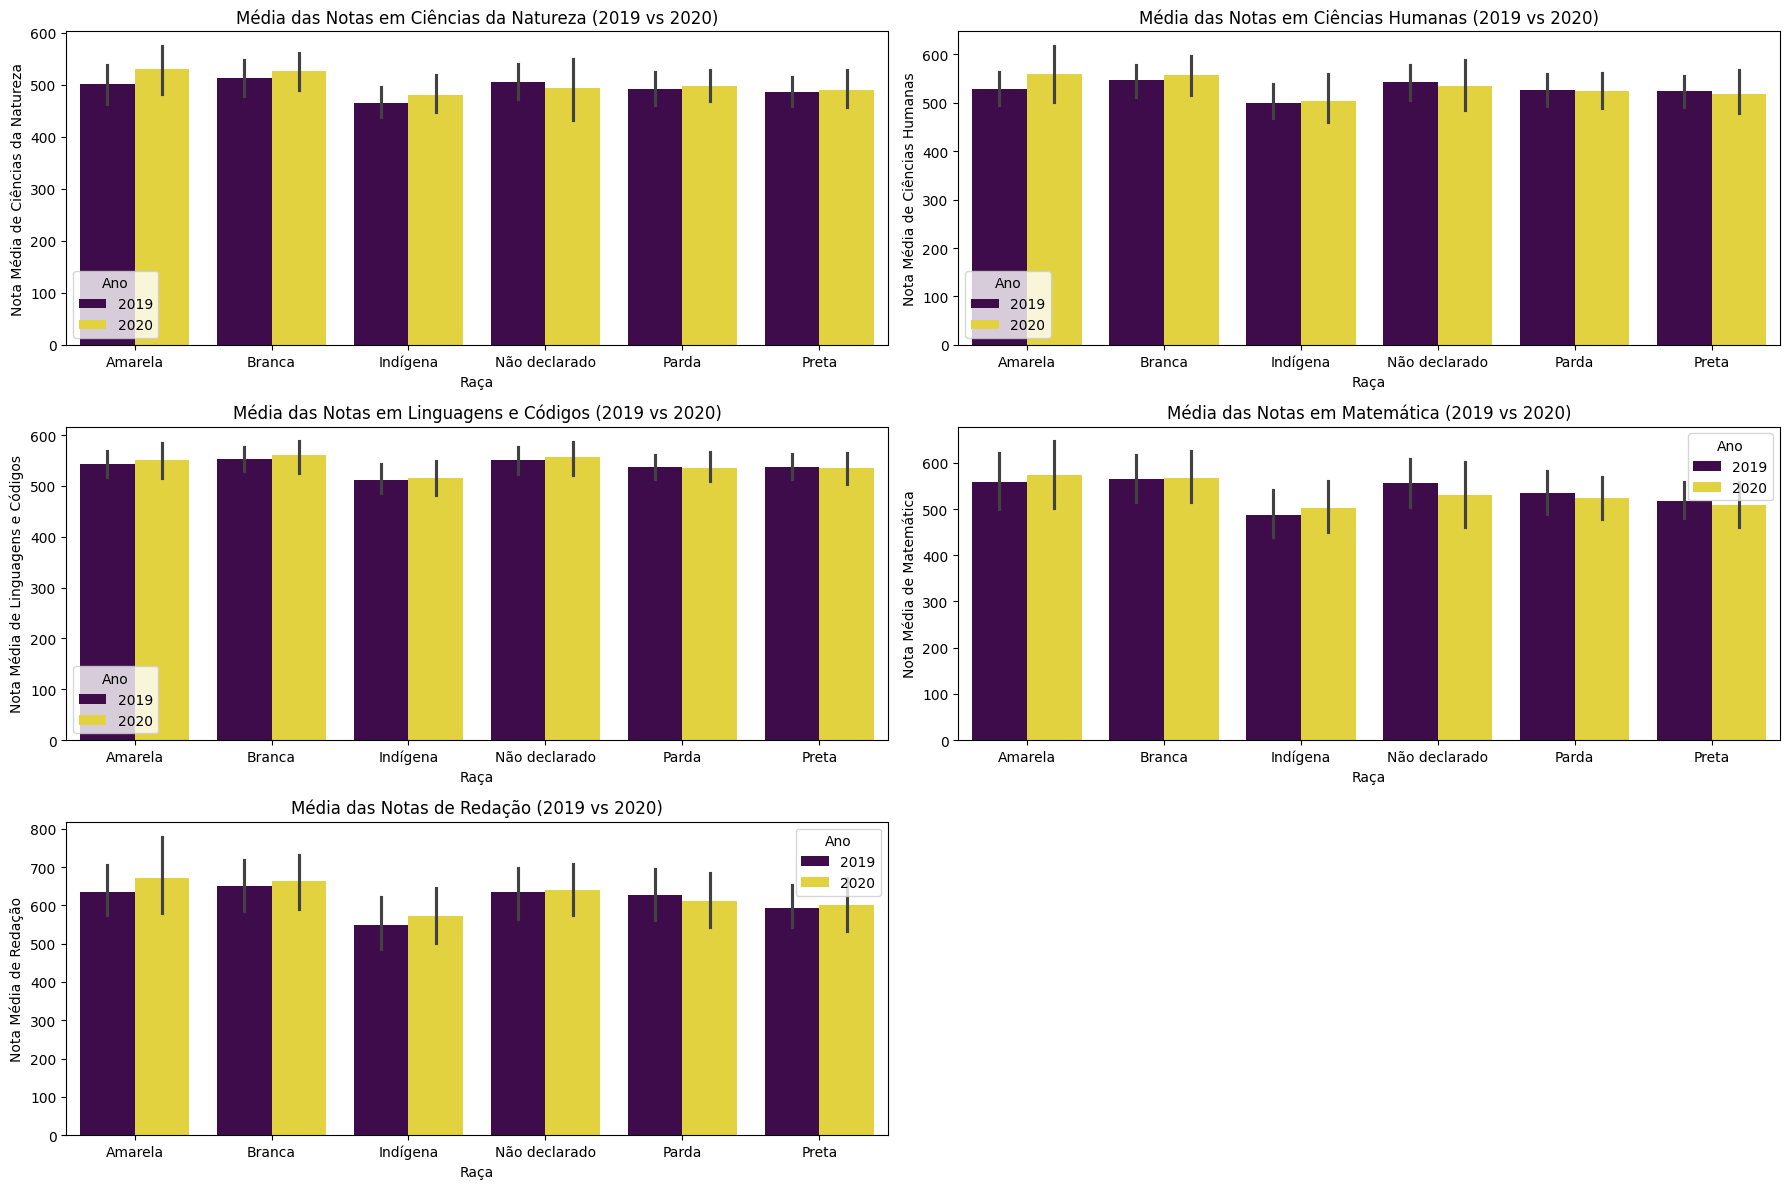

In [16]:
#graficico comparacao raca/cor em todas as materias
def plot_diferencas_desempenho(df):
    plt.figure(figsize=(18, 12))

    plt.subplot(3, 2, 1)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_CN', hue='Ano', palette='viridis')
    plt.title('Média das Notas em Ciências da Natureza (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Ciências da Natureza')
    plt.legend(title='Ano')

    plt.subplot(3, 2, 2)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_CH', hue='Ano', palette='viridis')
    plt.title('Média das Notas em Ciências Humanas (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Ciências Humanas')
    plt.legend(title='Ano')

    plt.subplot(3, 2, 3)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_LC', hue='Ano', palette='viridis')
    plt.title('Média das Notas em Linguagens e Códigos (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Linguagens e Códigos')
    plt.legend(title='Ano')

    plt.subplot(3, 2, 4)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_MT', hue='Ano', palette='viridis')
    plt.title('Média das Notas em Matemática (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Matemática')
    plt.legend(title='Ano')

    plt.subplot(3, 2, 5)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_REDACAO', hue='Ano', palette='viridis')
    plt.title('Média das Notas de Redação (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Redação')
    plt.legend(title='Ano')

    plt.tight_layout()
    plt.show()

plot_diferencas_desempenho(comparacao_media_notas)

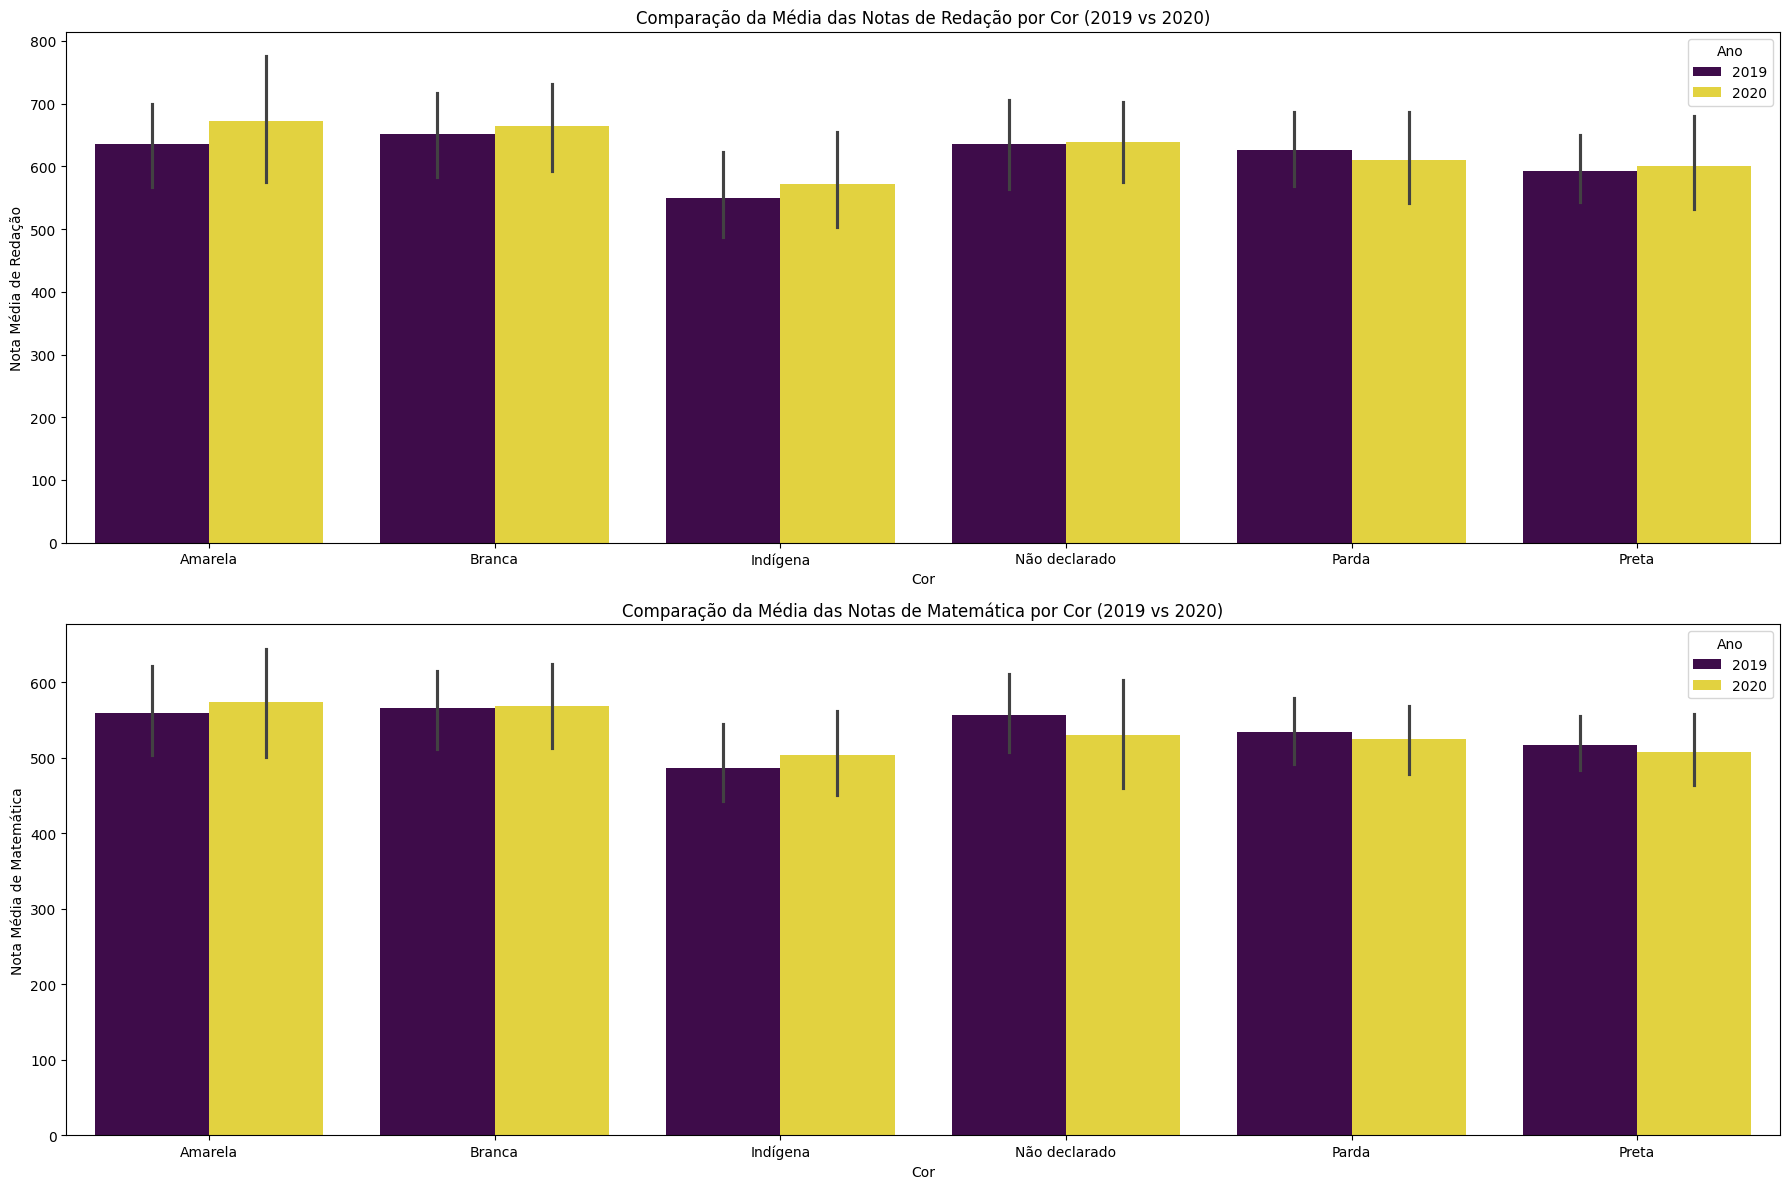

In [17]:
#grafico omparacao raca/cor (Matematica/Redacao)
def plot_comparacao_media_notas(df):
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 1, 1)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_REDACAO', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Redação por Cor (2019 vs 2020)')
    plt.xlabel('Cor')
    plt.ylabel('Nota Média de Redação')
    plt.legend(title='Ano')

    plt.subplot(2, 1, 2)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_MT', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Matemática por Cor (2019 vs 2020)')
    plt.xlabel('Cor')
    plt.ylabel('Nota Média de Matemática')
    plt.legend(title='Ano')

    plt.tight_layout()
    plt.show()

plot_comparacao_media_notas(comparacao_media_notas)

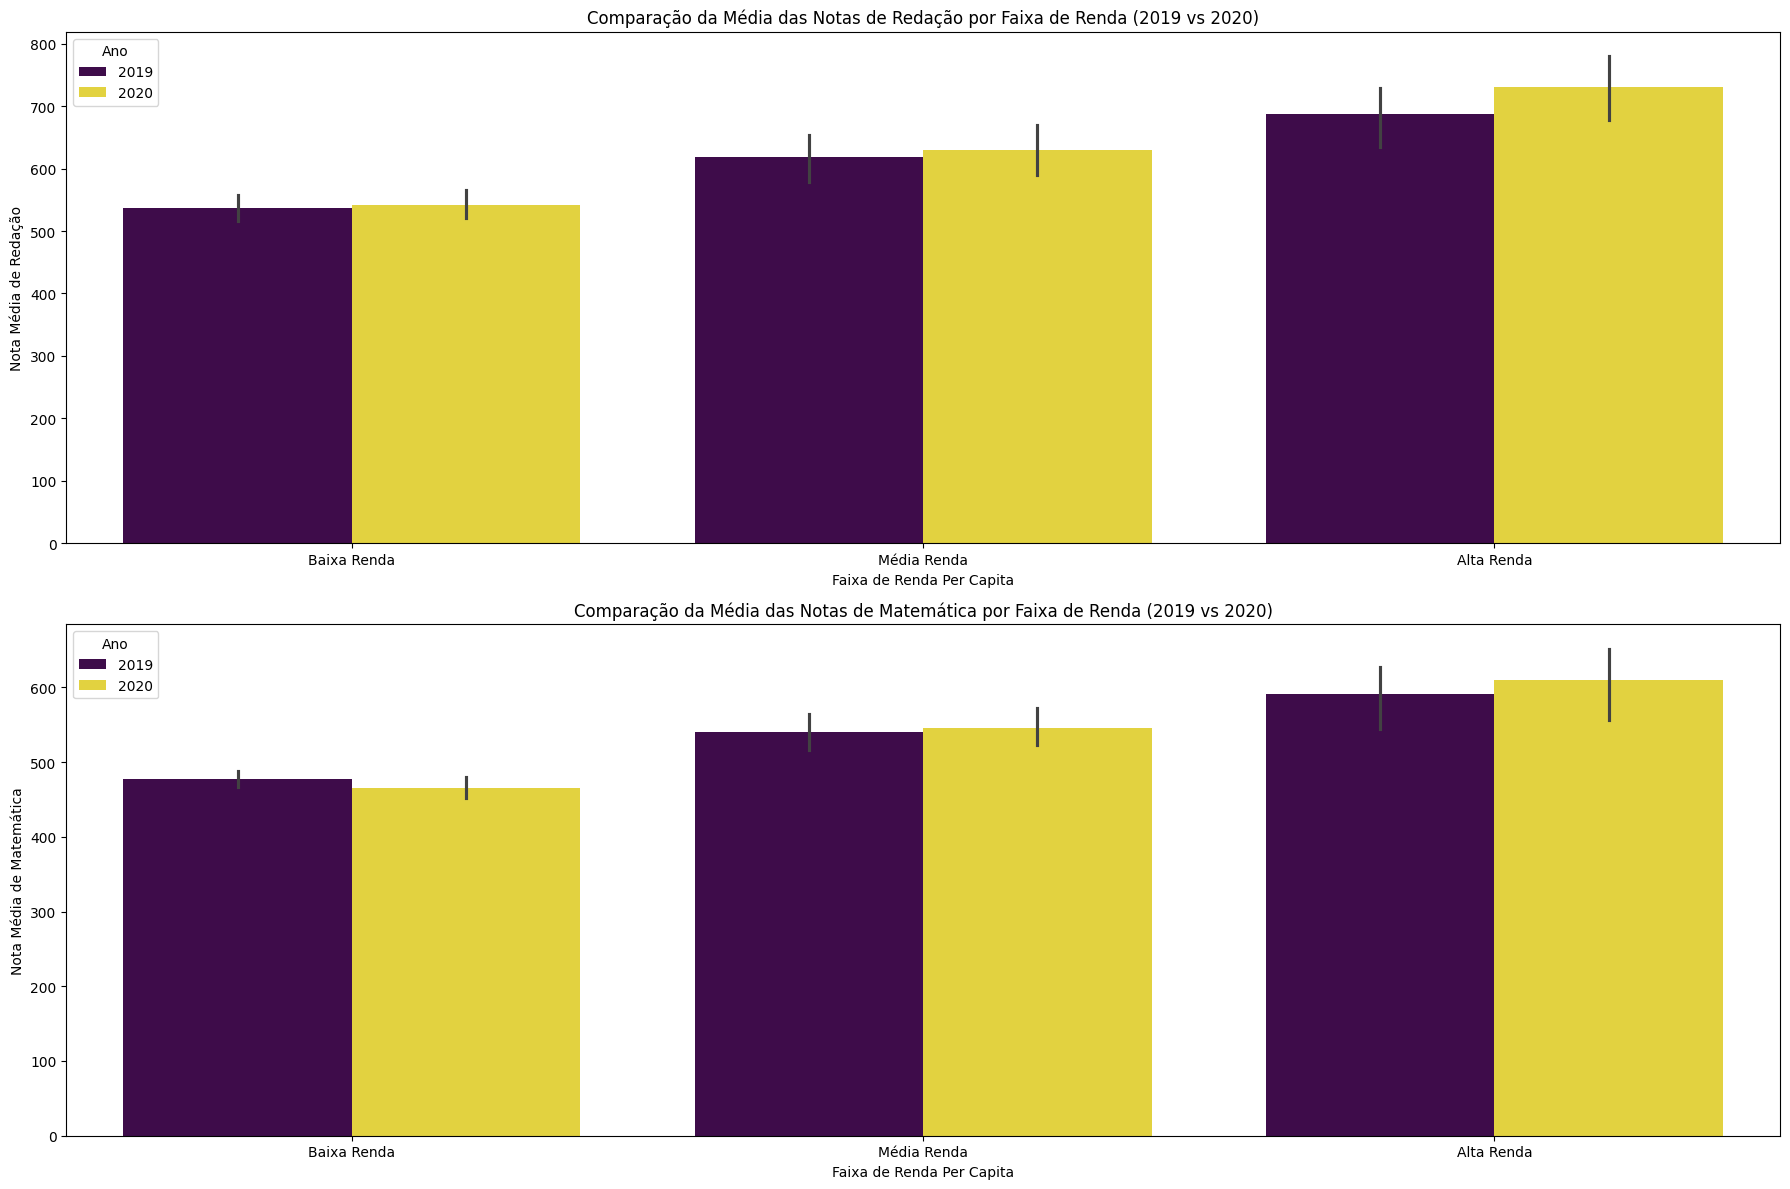

In [18]:
#grafico comparacao por renda (Matematica/Redacao)
def plot_comparacao_media_renda(df):
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 1, 1)
    sns.barplot(data=df, x='Faixa_Renda_Percapita', y='NU_NOTA_REDACAO', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Redação por Faixa de Renda (2019 vs 2020)')
    plt.xlabel('Faixa de Renda Per Capita')
    plt.ylabel('Nota Média de Redação')
    plt.legend(title='Ano')

    plt.subplot(2, 1, 2)
    sns.barplot(data=df, x='Faixa_Renda_Percapita', y='NU_NOTA_MT', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Matemática por Faixa de Renda (2019 vs 2020)')
    plt.xlabel('Faixa de Renda Per Capita')
    plt.ylabel('Nota Média de Matemática')
    plt.legend(title='Ano')

    plt.tight_layout()
    plt.show()

plot_comparacao_media_renda(comparacao_media_notas)

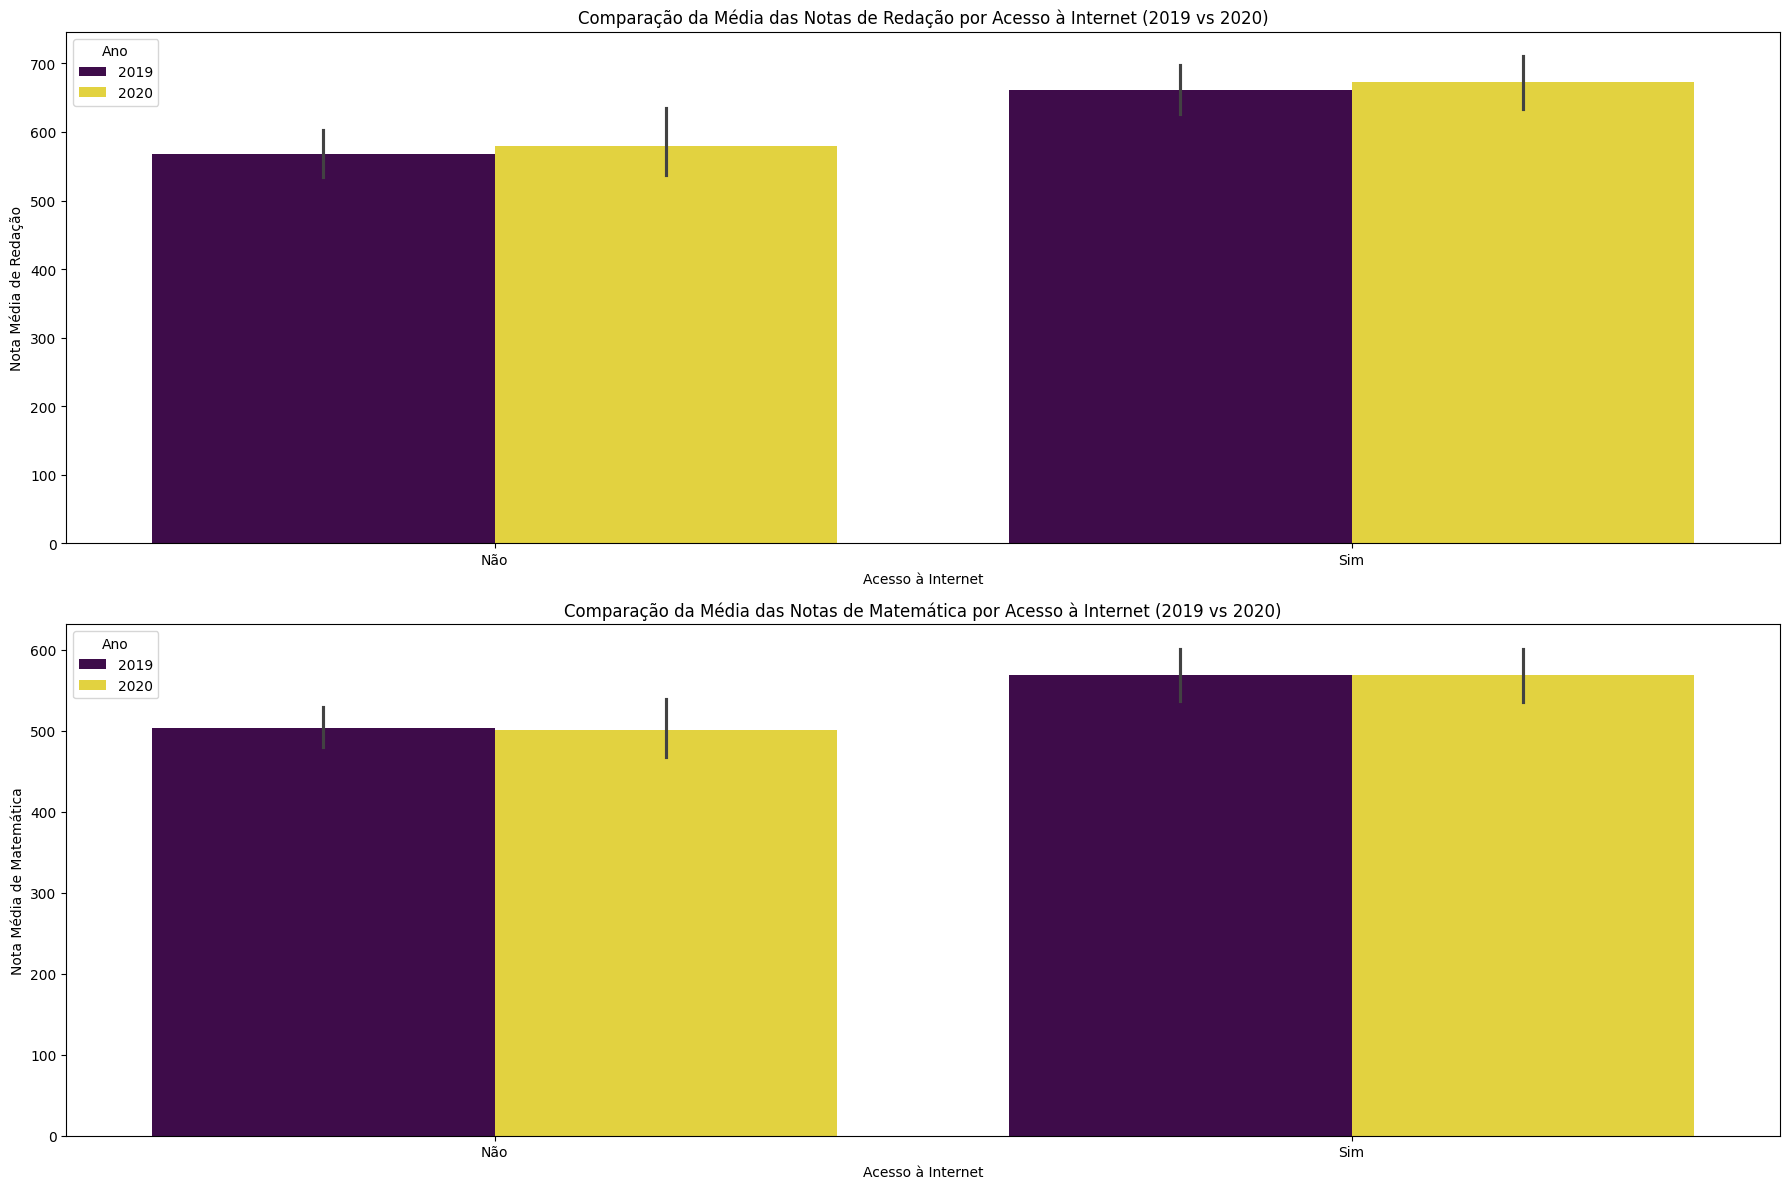

In [19]:
#grafico comparacao acesso a internet (Matematica/Redacao)
def plot_comparacao_media_internet(df):
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 1, 1)
    sns.barplot(data=df, x='Acesso à Internet', y='NU_NOTA_REDACAO', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Redação por Acesso à Internet (2019 vs 2020)')
    plt.xlabel('Acesso à Internet')
    plt.ylabel('Nota Média de Redação')
    plt.legend(title='Ano')

    plt.subplot(2, 1, 2)
    sns.barplot(data=df, x='Acesso à Internet', y='NU_NOTA_MT', hue='Ano', palette='viridis')
    plt.title('Comparação da Média das Notas de Matemática por Acesso à Internet (2019 vs 2020)')
    plt.xlabel('Acesso à Internet')
    plt.ylabel('Nota Média de Matemática')
    plt.legend(title='Ano')

    plt.tight_layout()
    plt.show()

plot_comparacao_media_internet(comparacao_media_notas)

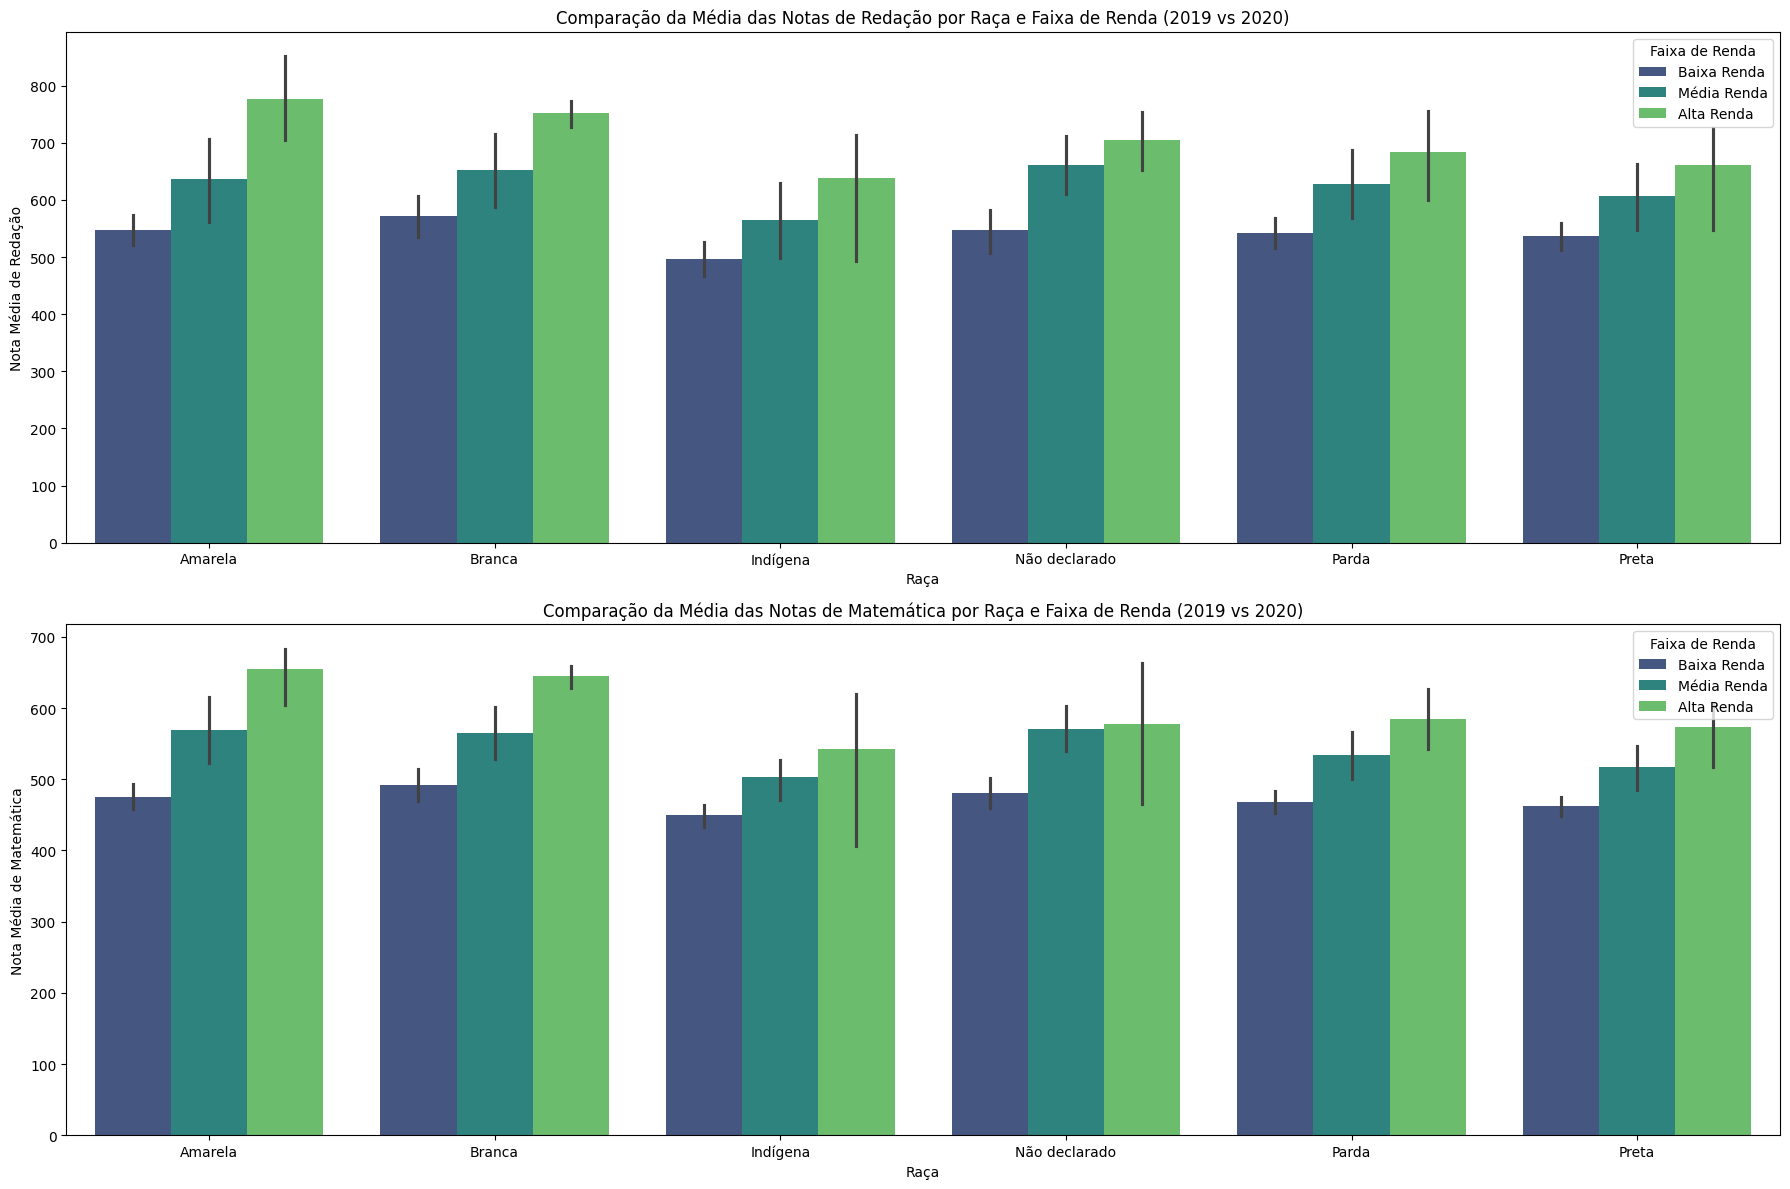

In [20]:
#grafico cor/raca e renda (Matematica/Redacao)
def plot_comparacao_media_raca_e_renda(df):
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 1, 1)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_REDACAO', hue='Faixa_Renda_Percapita', palette='viridis')
    plt.title('Comparação da Média das Notas de Redação por Raça e Faixa de Renda (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Redação')
    plt.legend(title='Faixa de Renda')

    plt.subplot(2, 1, 2)
    sns.barplot(data=df, x='Cor', y='NU_NOTA_MT', hue='Faixa_Renda_Percapita', palette='viridis')
    plt.title('Comparação da Média das Notas de Matemática por Raça e Faixa de Renda (2019 vs 2020)')
    plt.xlabel('Raça')
    plt.ylabel('Nota Média de Matemática')
    plt.legend(title='Faixa de Renda')

    plt.tight_layout()
    plt.show()

plot_comparacao_media_raca_e_renda(comparacao_media_notas)